In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import sklearn
import os
import missingno as mg

In [2]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Get the absolute path to the directory containing the notebook
notebook_dir = os.path.dirname(os.path.abspath("__file__"))  # Or hardcode if needed

# Construct the full path to the CSV file
csv_path = os.path.join(notebook_dir, 'films_cleaned.csv')

# Load the dataset
df = pd.read_csv(csv_path)

# Display full columns of the dataset
pd.set_option('display.max_columns', None)

# Display the first few row of the dataset
df.head()

,film_title,film_url,film_image_url,release_date,duration,age_classification,producers,director,top_stars,press_rating,viewer_rating,languages,distributor,year_of_production,film_nationality,filming_secrets,fr_entry_week,us_entry_week,fr_entries,us_entries,awards,budget,associated_genres,press_critics_count,viewer_critics_count,synopsis,film_id,release_season,duration_minutes,producers_count,producer_1,producer_2,producer_3,producer_4,top_stars_count,top_star_1,top_star_2,top_star_3,language_count,film_nationality_count,filming_secrets_num,fr_entry_week_period,fr_entry_week_iso_week,us_entry_week_period,us_entry_week_iso_week,fr_entries_num,us_entries_num,award_count,nomination_count,total_awards_nomination,associated_genres_count,press_critics_count_num,viewer_notes,viewer_critiques,synopsis_length
0,Délocalisés,https://www.allocine.fr/film/fichefilm_gen_cfi...,https://fr.web.img6.acsta.net/c_310_420/img/c7...,2025-03-12,1h 26min,Tout public,"Ali Boughéraba,Redouane Bougheraba,Germain Blo...",Ali Boughéraba,"Redouane Bougheraba,Vanessa Guide,Ahassan Uddin",2.8,2.5,Français,Studiocanal / TF1 Studio,2025,NaN,8 anecdotes,NaN,NaN,NaN,NaN,NaN,-,Comédie,4 critiques,"566 notes, 241 critiques",Le jour où Redouane va obtenir sa promotion et...,1000001269,Spring,86,4,Ali Boughéraba,Redouane Bougheraba,Germain Blot,Cédric Dosne,3,Redouane Bougheraba,Vanessa Guide,Ahassan Uddin,1,0,8,NaN,0,NaN,0,0,0,0,0,0,1,4,566,241,717
1,À bicyclette !,https://www.allocine.fr/film/fichefilm_gen_cfi...,https://fr.web.img2.acsta.net/c_310_420/img/9c...,2025-02-26,1h 29min,Tout public,"Mathias Mlekuz,Philippe Rebbot",Mathias Mlekuz,"Mathias Mlekuz,Philippe Rebbot,Josef Mlekuz",3.8,4.1,Français,Ad Vitam,2024,NaN,12 anecdotes,05 au 12 mars 2025,NaN,108 029,NaN,1 prix et 1 nomination,-,Comédie dramatique,24 critiques,"2612 notes, 715 critiques","De l’Atlantique à la mer Noire, Mathias embarq...",323031,Winter,89,2,Mathias Mlekuz,Philippe Rebbot,NaN,NaN,3,Mathias Mlekuz,Philippe Rebbot,Josef Mlekuz,1,0,12,05/03/2025 – 12/03/2025,10,NaN,0,108029,0,1,1,2,1,24,2612,715,280
2,Black Dog,https://www.allocine.fr/film/fichefilm_gen_cfi...,https://fr.web.img5.acsta.net/c_310_420/img/99...,2025-03-05,1h 50min,Tout public,"Hu Guan,Rui Ge",Hu Guan,"Eddie Peng,Liya Tong,Jia Zhangke",4.2,4.1,Chinois,Memento,2024,NaN,11 anecdotes,05 au 12 mars 2025,NaN,62 059,NaN,NaN,-,Drame,30 critiques,"1638 notes, 165 critiques",Lang revient dans sa ville natale aux portes d...,1000000974,Spring,110,2,Hu Guan,Rui Ge,NaN,NaN,3,Eddie Peng,Liya Tong,Jia Zhangke,1,0,11,05/03/2025 – 12/03/2025,10,NaN,0,62059,0,0,0,0,1,30,1638,165,283
3,L’Attachement,https://www.allocine.fr/film/fichefilm_gen_cfi...,https://fr.web.img3.acsta.net/c_310_420/img/83...,2025-02-19,1h 45min,Tout public,"Carine Tardieu,Raphaële Moussafir",Carine Tardieu,"Valeria Bruni Tedeschi,Pio Marmaï,Vimala Pons",4.0,4.2,Français,Diaphana Distribution,2024,"France,Belgique",7 anecdotes,05 au 12 mars 2025,NaN,128 314,NaN,NaN,-,Drame,34 critiques,"3156 notes, 383 critiques","Sandra, quinquagénaire farouchement indépendan...",313781,Winter,105,2,Carine Tardieu,Raphaële Moussafir,NaN,NaN,3,Valeria Bruni Tedeschi,Pio Marmaï,Vimala Pons,1,2,7,05/03/2025 – 12/03/2025,10,NaN,0,128314,0,0,0,0,1,34,3156,383,219
4,The Brutalist,https://www.allocine.fr/film/fichefilm_gen_cfi...,https://fr.web.img5.acsta.net/c_310_420/img/22...,2025-02-12,3h 34min,Tout public avec avertissement,"Brady Corbet,Mona Fastvold",Brady Corbet,"Adrien Brody,Felicity Jones,Guy Pearce",4.3,4.0,"Anglais, Hongrois",Universal Pictures International France,2024,"Grande-Bretagne,U.S.A.,Hongrie",13 anecdotes,12 au 19 février 2025,24 au 27 janvier 2025,142 318,2 873 057,11 prix et 17 nominations,-,Drame,42 critiques,"3985 notes, 488 critiques","Fuyant l’Europe d’après-guerre, l’architecte v...",269838,Winter,214,2,Brady Corbet,Mona Fastvold,NaN,NaN,3,Adrien Brody,Felicity Jones,Guy Pearce,2,3,13,12/02/2025 – 19/02/2025,7,24/01/2025 – 27/01/2025,4,142318,2873057,11,17,28,1,42,

In [3]:
# Subset the dataset to include only the relevant columns
df_subset = df[['film_id', 'film_title', 'release_date', 'age_classification', 
       'press_rating', 'viewer_rating', 'distributor', 'year_of_production', 
       'release_season','duration_minutes', 'producers_count', 
       'top_stars_count', 'language_count', 'film_nationality_count', 'filming_secrets_num', 
       'fr_entry_week_iso_week', 'us_entry_week_iso_week',
       'fr_entries_num', 'us_entries_num', 'award_count', 'nomination_count',
       'total_awards_nomination', 'associated_genres_count', 'press_critics_count_num', 'viewer_notes',
       'viewer_critiques', 'synopsis_length']]

In [4]:
# Extract the film title length and character length from the film_title
df_subset['film_title_length'] = df_subset['film_title'].apply(lambda x: len((x.split())))
df_subset['film_title_chracter_length'] = df_subset['film_title'].apply(lambda x: len(x))

/var/folders/ml/v613w2ns1z31hpn87j8vcl8h0000gq/T/ipykernel_1612/2213797150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['film_title_length'] = df_subset['film_title'].apply(lambda x: len((x.split())))
/var/folders/ml/v613w2ns1z31hpn87j8vcl8h0000gq/T/ipykernel_1612/2213797150.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['film_title_chracter_length'] = df_subset['film_title'].apply(lambda x: len(x))


In [5]:
# Drop the original film_title column
df_subset.drop(columns=['film_title', 'distributor', 'release_date'], inplace=True)

/var/folders/ml/v613w2ns1z31hpn87j8vcl8h0000gq/T/ipykernel_1612/420053337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.drop(columns=['film_title', 'distributor', 'release_date'], inplace=True)


In [6]:
df_subset.head()

,film_id,age_classification,press_rating,viewer_rating,year_of_production,release_season,duration_minutes,producers_count,top_stars_count,language_count,film_nationality_count,filming_secrets_num,fr_entry_week_iso_week,us_entry_week_iso_week,fr_entries_num,us_entries_num,award_count,nomination_count,total_awards_nomination,associated_genres_count,press_critics_count_num,viewer_notes,viewer_critiques,synopsis_length,film_title_length,film_title_chracter_length
0,1000001269,Tout public,2.8,2.5,2025,Spring,86,4,3,1,0,8,0,0,0,0,0,0,0,1,4,566,241,717,1,11
1,323031,Tout public,3.8,4.1,2024,Winter,89,2,3,1,0,12,10,0,108029,0,1,1,2,1,24,2612,715,280,3,14
2,1000000974,Tout public,4.2,4.1,2024,Spring,110,2,3,1,0,11,10,0,62059,0,0,0,0,1,30,1638,165,283,2,9
3,313781,Tout public,4.0,4.2,2024,Winter,105,2,3,1,2,7,10,0,128314,0,0,0,0,1,34,3156,383,219,1,13
4,269838,Tout public avec avertissement,4.3,4.0,2024,Winter,214,2,3,2,3,13,7,4,142318,2873057,11,17,28,1,42,3985,488,274,2,13


<Axes: >

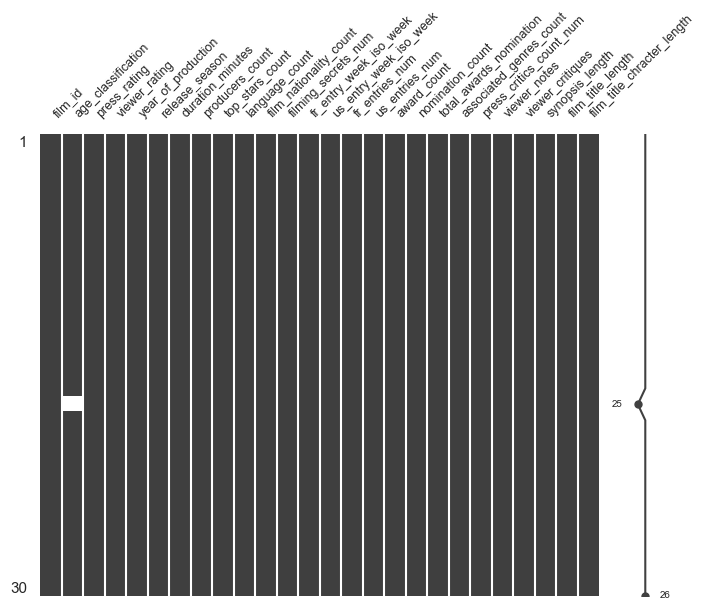

In [7]:
mg.matrix(df_subset, figsize=(8, 6), fontsize=9)

In [8]:
# Drop rows with missing values in the 'age_classification' columns
df_subset.dropna(subset = ['age_classification'], inplace = True)

# Reset the index after dropping rows
df_subset.reset_index(drop=True, inplace=True)

/var/folders/ml/v613w2ns1z31hpn87j8vcl8h0000gq/T/ipykernel_1612/4071590592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.dropna(subset = ['age_classification'], inplace = True)


<Axes: >

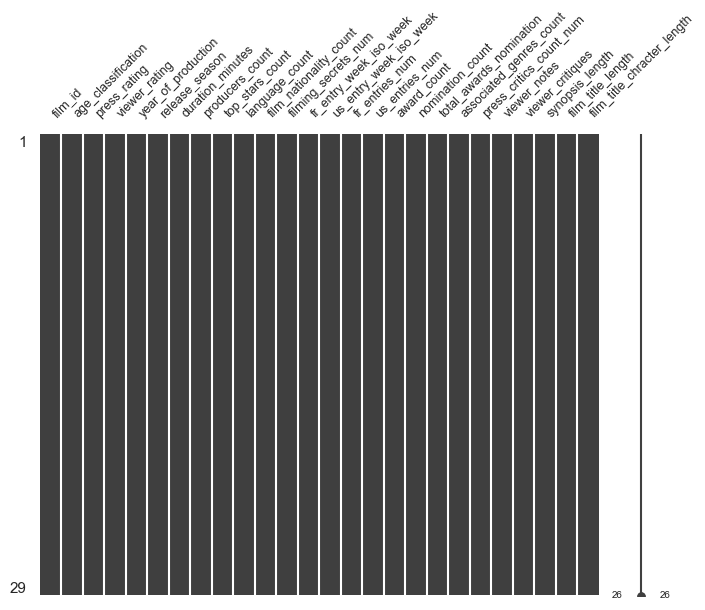

In [9]:
mg.matrix(df_subset, figsize=(8, 6), fontsize=9)

In [11]:
df_subset = df_subset[['fr_entries_num', 'film_id', 'age_classification', 'press_rating', 'viewer_rating',
       'year_of_production', 'release_season', 'duration_minutes',
       'producers_count', 'top_stars_count', 'language_count',
       'film_nationality_count', 'filming_secrets_num',
       'fr_entry_week_iso_week', 'us_entry_week_iso_week',
       'us_entries_num', 'award_count', 'nomination_count',
       'total_awards_nomination', 'associated_genres_count',
       'press_critics_count_num', 'viewer_notes', 'viewer_critiques',
       'synopsis_length', 'film_title_length', 'film_title_chracter_length']]

In [12]:
df_subset.head()

,fr_entries_num,film_id,age_classification,press_rating,viewer_rating,year_of_production,release_season,duration_minutes,producers_count,top_stars_count,language_count,film_nationality_count,filming_secrets_num,fr_entry_week_iso_week,us_entry_week_iso_week,us_entries_num,award_count,nomination_count,total_awards_nomination,associated_genres_count,press_critics_count_num,viewer_notes,viewer_critiques,synopsis_length,film_title_length,film_title_chracter_length
0,0,1000001269,Tout public,2.8,2.5,2025,Spring,86,4,3,1,0,8,0,0,0,0,0,0,1,4,566,241,717,1,11
1,108029,323031,Tout public,3.8,4.1,2024,Winter,89,2,3,1,0,12,10,0,0,1,1,2,1,24,2612,715,280,3,14
2,62059,1000000974,Tout public,4.2,4.1,2024,Spring,110,2,3,1,0,11,10,0,0,0,0,0,1,30,1638,165,283,2,9
3,128314,313781,Tout public,4.0,4.2,2024,Winter,105,2,3,1,2,7,10,0,0,0,0,0,1,34,3156,383,219,1,13
4,142318,269838,Tout public avec avertissement,4.3,4.0,2024,Winter,214,2,3,2,3,13,7,4,2873057,11,17,28,1,42,3985,488,274,2,13


Text(0.5, 1.0, 'Distribution of French Entries Number')

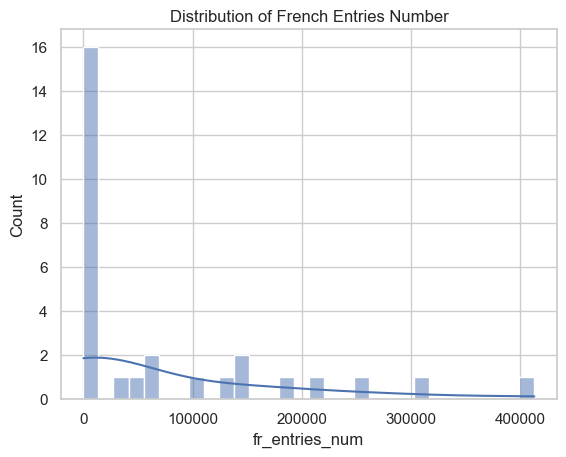

In [18]:
sns.histplot(data=df_subset, x='fr_entries_num', bins=30, kde=True)
plt.title('Distribution of French Entries Number')

In [16]:
# One-Hot Encode "age_classification" column
df_subset = pd.get_dummies(df_subset, columns=['age_classification', 'release_season']).astype(int)

In [21]:
df_subset.columns

Index(['fr_entries_num', 'film_id', 'press_rating', 'viewer_rating',
       'year_of_production', 'duration_minutes', 'producers_count',
       'top_stars_count', 'language_count', 'film_nationality_count',
       'filming_secrets_num', 'fr_entry_week_iso_week',
       'us_entry_week_iso_week', 'us_entries_num', 'award_count',
       'nomination_count', 'total_awards_nomination',
       'associated_genres_count', 'press_critics_count_num', 'viewer_notes',
       'viewer_critiques', 'synopsis_length', 'film_title_length',
       'film_title_chracter_length', 'age_classification_Interdit - 12 ans',
       'age_classification_Interdit - 12 ans avec avertissement',
       'age_classification_Tout public',
       'age_classification_Tout public avec avertissement',
       'release_season_Autumn', 'release_season_Spring',
       'release_season_Summer', 'release_season_Winter'],
      dtype='object')

In [22]:
# Separate feature and target parameters
x_model_features = df_subset[['film_id', 'press_rating', 'viewer_rating',
       'year_of_production', 'duration_minutes', 'producers_count',
       'top_stars_count', 'language_count', 'film_nationality_count',
       'filming_secrets_num', 'fr_entry_week_iso_week',
       'us_entry_week_iso_week', 'us_entries_num', 'award_count',
       'nomination_count', 'total_awards_nomination',
       'associated_genres_count', 'press_critics_count_num', 'viewer_notes',
       'viewer_critiques', 'synopsis_length', 'film_title_length',
       'film_title_chracter_length', 'age_classification_Interdit - 12 ans',
       'age_classification_Interdit - 12 ans avec avertissement',
       'age_classification_Tout public',
       'age_classification_Tout public avec avertissement',
       'release_season_Autumn', 'release_season_Spring',
       'release_season_Summer', 'release_season_Winter']]

y_target_feature = df_subset[['fr_entries_num']]

In [23]:
# Transform (to normalize distribution as much as possible)
# Scale features (to have feature parameters on the same scale)

from sklearn.preprocessing import StandardScaler 

x_model_features_log = np.log1p(x_model_features)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the input data (X)
x_scaled = scaler.fit_transform(x_model_features_log)

In [24]:
# Transform target 
y_log = np.log1p(y_target_feature)

In [25]:
# Calculate f_statistic 
from sklearn.feature_selection import f_regression

f_statistic, p_values = f_regression(x_scaled,y_log)

/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
# Display f_statistic
features = pd.DataFrame({"Parameters": x_model_features.columns,
              "f_statistic": f_statistic,
              "p-value": p_values
              })

# Sort selected features
features.sort_values(by= ['f_statistic', 'p-value'], ascending=False).reset_index(drop=True)

,Parameters,f_statistic,p-value
0,year_of_production,50.613398,1.193067e-07
1,fr_entry_week_iso_week,40.337123,8.432376e-07
2,release_season_Spring,34.353185,3.052632e-06
3,viewer_notes,23.104450,5.120430e-05
4,total_awards_nomination,13.555774,1.020450e-03
5,nomination_count,12.712860,1.379713e-03
6,release_season_Winter,11.836127,1.903512e-03
7,award_count,9.640769,4.435281e-03
8,viewer_critiques,9.098378,5.519730e-03
9,press_rating,8.039973,8.565033e-03


In [ ]:
# Select features with p-value < 0.05
selected_features = features[features['p-value'] < 0.05].sort_values(by = 'f_statistic', ascending = False)['Parameters'].values
selected_features

array(['year_of_production', 'fr_entry_week_iso_week',
       'release_season_Spring', 'viewer_notes', 'total_awards_nomination',
       'nomination_count', 'release_season_Winter', 'award_count',
       'viewer_critiques', 'press_rating', 'press_critics_count_num',
       'us_entry_week_iso_week', 'viewer_rating', 'producers_count'],
      dtype=object)

## Checking for multicolinearity

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_scaled_df = pd.DataFrame(x_scaled[ : , :14], columns= ['year_of_production', 'fr_entry_week_iso_week',
       'release_season_Spring', 'viewer_notes', 'total_awards_nomination',
       'nomination_count', 'release_season_Winter', 'award_count',
       'viewer_critiques', 'press_rating', 'press_critics_count_num',
       'us_entry_week_iso_week', 'viewer_rating', 'producers_count'])
       
variables=x_scaled_df[['year_of_production', 'fr_entry_week_iso_week',
       'release_season_Spring', 'viewer_notes', 'total_awards_nomination',
       'nomination_count', 'release_season_Winter', 'award_count',
       'viewer_critiques', 'press_rating', 'press_critics_count_num',
       'us_entry_week_iso_week', 'viewer_rating', 'producers_count']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

In [34]:
vif

,VIF,Features
0,3.702648,year_of_production
1,7.305678,fr_entry_week_iso_week
2,6.284714,release_season_Spring
3,5.733010,viewer_notes
4,3.137078,total_awards_nomination
5,2.338805,nomination_count
6,2.757686,release_season_Winter
7,3.221600,award_count
8,2.704015,viewer_critiques
9,1.868877,press_rating


In [41]:
# Define features and target
selected_variables = df_subset[['fr_entries_num', 'year_of_production', 'fr_entry_week_iso_week', 
                                'release_season_Spring', 'release_season_Winter', 
                                'us_entry_week_iso_week', 'producers_count']]

X = selected_variables.drop('fr_entries_num', axis=1)
y = selected_variables[['fr_entries_num']]

In [51]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define features and target
selected_variables = df_subset[['fr_entries_num', 'fr_entry_week_iso_week', 'producers_count',
                                'us_entry_week_iso_week',]]

#  'release_season_Spring', 'release_season_Winter', 'year_of_production', 
X = selected_variables.drop('fr_entries_num', axis=1)
y = selected_variables[['fr_entries_num']]

# Identify numerical columns (you can adjust this if you later include categorical variables)
numerical_features = X.select_dtypes(include=['number']).columns.tolist()

# Pipeline: log transform + scaling
num_pipeline = Pipeline([
    ('log_transform', FunctionTransformer(np.log1p, validate=False)),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numerical_features)
    ]
)

# Apply transformations
X_encoded = preprocessor.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Statsmodels: Add intercept and fit OLS
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

# Scikit-learn regression model
model_sk = LinearRegression()
model_sk.fit(X_train, y_train)

# Predict
y_pred = model_sk.predict(X_test)

# Evaluation
r_squared = model_sk.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r_squared:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


                            OLS Regression Results                            
Dep. Variable:         fr_entries_num   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     12.97
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           7.63e-05
Time:                        17:57:13   Log-Likelihood:                -287.97
No. Observations:                  23   AIC:                             583.9
Df Residuals:                      19   BIC:                             588.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        8.97e+04   1.53e+04      5.868      0.0

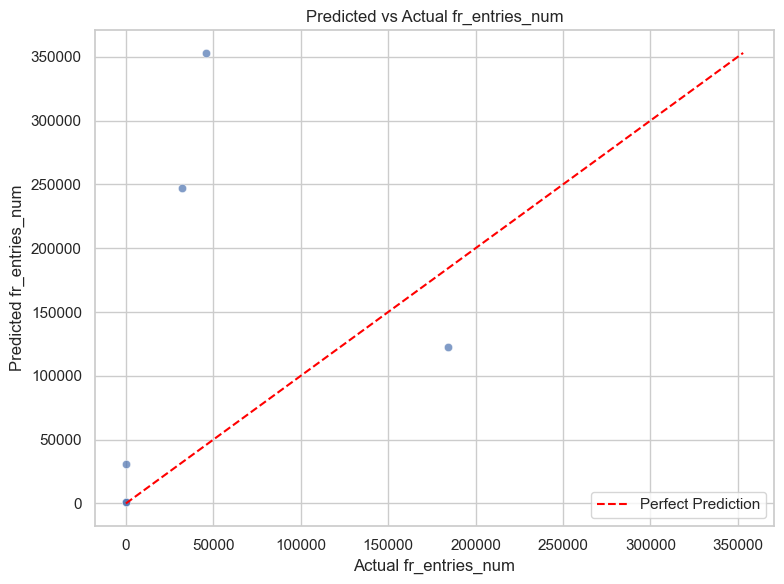

In [ ]:
# Plot predicted vs actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test.values.flatten(), y=y_pred.flatten(), alpha=0.7)

# Add diagonal reference line
max_val = max(y_test.max().values[0], y_pred.max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Perfect Prediction')

plt.title("Predicted vs Actual fr_entries_num")
plt.xlabel("Actual fr_entries_num")
plt.ylabel("Predicted fr_entries_num")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [59]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Define features and target
selected_variables = df_subset[['fr_entries_num', 'year_of_production', 'fr_entry_week_iso_week', 'release_season_Spring', 'release_season_Winter', 
       'us_entry_week_iso_week', 'producers_count']]

X = selected_variables.drop('fr_entries_num', axis=1)
y = selected_variables[['fr_entries_num']]

# 1. Add Polynomial Features of degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# 3. Define models and hyperparameters for GridSearch

# RandomForest Regressor hyperparameters
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# GradientBoosting Regressor hyperparameters
gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

# SVR hyperparameters
svr_params = {
    'kernel': ['rbf', 'linear'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
    'gamma': ['scale', 'auto']
}

# 4. Initialize the models
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
svr_model = SVR()

# 5. Set up GridSearchCV for each model
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=rf_params, cv=5, n_jobs=-1, verbose=2)
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=gb_params, cv=5, n_jobs=-1, verbose=2)
grid_search_svr = GridSearchCV(estimator=svr_model, param_grid=svr_params, cv=5, n_jobs=-1, verbose=2)

# 6. Fit the models using GridSearch
grid_search_rf.fit(X_train, y_train)
grid_search_gb.fit(X_train, y_train)
grid_search_svr.fit(X_train, y_train)

# 7. Get the best parameters
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best parameters for Gradient Boosting: {grid_search_gb.best_params_}")
print(f"Best parameters for SVR: {grid_search_svr.best_params_}")

# 8. Make predictions using the best models
y_pred_rf = grid_search_rf.predict(X_test)
y_pred_gb = grid_search_gb.predict(X_test)
y_pred_svr = grid_search_svr.predict(X_test)

# 9. Evaluate each model
def evaluate_model(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return r2, rmse, mae

# Evaluate Random Forest
r2_rf, rmse_rf, mae_rf = evaluate_model(y_test, y_pred_rf)
print(f"Random Forest - R²: {r2_rf:.3f}, RMSE: {rmse_rf:.2f}, MAE: {mae_rf:.2f}")

# Evaluate Gradient Boosting
r2_gb, rmse_gb, mae_gb = evaluate_model(y_test, y_pred_gb)
print(f"Gradient Boosting - R²: {r2_gb:.3f}, RMSE: {rmse_gb:.2f}, MAE: {mae_gb:.2f}")

# Evaluate SVR
r2_svr, rmse_svr, mae_svr = evaluate_model(y_test, y_pred_svr)
print(f"SVR - R²: {r2_svr:.3f}, RMSE: {rmse_svr:.2f}, MAE: {mae_svr:.2f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits


Python(6646) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(6647) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(6648) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(6649) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(6650) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(6651) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
Python(6652) MallocStackLogging: can't turn off malloc stack logging because it was no

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.5s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.5s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.8s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s



/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_sampl

/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.6s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.6s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_sample

/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.8s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.6s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1

/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2

/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf

/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
Fitting 5 folds for each of 81 candidates, totalling 405 fits


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d

[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0

/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.3s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.1s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsa

/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subs

/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.2s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.1s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=50, subs

/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.2s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.4s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.3s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.

/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0

/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.1s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.1s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.9; 

/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.2s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.2s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.5s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.1s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.9; total time=   0.1s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.9; total

/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.2s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.2s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.3s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.2s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   1.2s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   2.2s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   3.7s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.9; total time=   4.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   3.9s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.9; total time=   4.2s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.9; total time=   4.2s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   4.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.1s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.6s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   4.3s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   1.6s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   1.6s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   1.6s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.9; total time=   1.9s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.9; total time=   1.7s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   2.5s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.4s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.6s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.6s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.6s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.3s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.5s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.1s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8; 

/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.1s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1

/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0

/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.1s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.6s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.9s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.4s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=50, subsample=1.0; total t

/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.3s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.3s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.6s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.9s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.8s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.9s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.9; total time=   1.8s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   1.5s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   1.8s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   1.6s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.9; total time=   1.9s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   1.6s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   1.6s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .......C=0.1, epsilon=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.01, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .......C=0.1, epsilon=0.01, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .......C=0.1, epsilon=0.01, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ....C=0.1, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ........C=0.1, epsilon=0.01, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.01, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.01, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.01, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....C=0.1, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ........C=0.1, epsilon=0.01, gamma=aut

/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mic

[CV] END .........C=0.1, epsilon=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.5, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.5, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....C=0.1, epsilon=0.01, gamma=auto, kernel=linear; total time=   0.1s
[CV] END ......C=0.1, epsilon=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.1, gamma=auto, kernel=linear; total time=   0.1s
[CV] END .........C=0.1, epsilon=0.5, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.1, gamma=auto, kernel=linear; total time=   0.1s
[CV] END ......C=0.1, epsilo

/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mic

[CV] END .....C=10, epsilon=0.01, gamma=scale, kernel=linear; total time= 2.2min


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=10, epsilon=0.01, gamma=scale, kernel=linear; total time=   9.0s
[CV] END .........C=10, epsilon=0.01, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .........C=10, epsilon=0.01, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .........C=10, epsilon=0.01, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .........C=10, epsilon=0.01, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .........C=10, epsilon=0.01, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ......C=10, epsilon=0.01, gamma=auto, kernel=linear; total time=   0.0s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mic

[CV] END ......C=10, epsilon=0.01, gamma=auto, kernel=linear; total time= 3.2min


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=10, epsilon=0.01, gamma=scale, kernel=linear; total time= 3.2min


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......C=10, epsilon=0.01, gamma=auto, kernel=linear; total time= 1.2min


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....C=10, epsilon=0.01, gamma=scale, kernel=linear; total time= 1.2min
[CV] END ......C=10, epsilon=0.01, gamma=auto, kernel=linear; total time= 1.5min


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......C=10, epsilon=0.01, gamma=auto, kernel=linear; total time=   6.6s
[CV] END .........C=10, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .........C=10, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .........C=10, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=10, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.0s


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mic

Best parameters for Random Forest: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best parameters for SVR: {'C': 10, 'epsilon': 0.5, 'gamma': 'auto', 'kernel': 'rbf'}
Random Forest - R²: -2.845, RMSE: 16379449157.43, MAE: 76876.39
Gradient Boosting - R²: -1.613, RMSE: 11132721225.82, MAE: 72322.00
SVR - R²: -0.448, RMSE: 6168236132.96, MAE: 43692.75


/Users/michaeladebayo/Documents/Simplon/brief_projects/movie_prediction/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
